# Statistical Data Analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from scipy.stats import t, ttest_ind

Prior to performing the statistical analysis, Let us first take a look at the box office data from the CSV file stored in the pandas DataFrame boxoffice_df. Using the built-in functions, we can explore the first five rows of the DataFrame as well as the type of data in each column.

In [2]:
boxoffice_df = pd.read_csv('boxoffice.csv',index_col=0)
boxoffice_df.head()

,imdbID,Title,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
0,tt0114709,Toy Story,191796233.0,29140617.0,6.581749,100.0,95.0,8.3,820774.0,1995,10.0,30000000.0,21.946943,7.7,5415.0
1,tt0113497,Jumanji,100475249.0,11084370.0,9.064588,54.0,39.0,7.0,276338.0,1995,12.0,65000000.0,17.015539,6.9,2413.0
2,tt0113228,Grumpier Old Men,71518503.0,7797185.0,9.172349,17.0,46.0,6.7,22673.0,1995,12.0,NaN,11.712900,6.5,92.0
3,tt0114885,Waiting to Exhale,67052156.0,14126927.0,4.746408,56.0,NaN,5.9,8898.0,1995,12.0,16000000.0,3.859495,6.1,34.0
4,tt0113041,Father of the Bride Part II,76594107.0,11134978.0,6.878694,48.0,49.0,6.0,31909.0,1995,2.0,NaN,8.387519,5.7,173.0


In [3]:
boxoffice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12047 entries, 0 to 45373
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 10793 non-null  object 
 1   Title                  12047 non-null  object 
 2   Domestic Gross         12047 non-null  float64
 3   Opening Weekend        11022 non-null  float64
 4   Domestic Multiplier    11022 non-null  float64
 5   Rotten Tomatoes Score  11248 non-null  float64
 6   Metascore              8974 non-null   float64
 7   imdbRating             12046 non-null  float64
 8   imdbVotes              12045 non-null  float64
 9   Year                   12047 non-null  int64  
 10  Month                  12034 non-null  float64
 11  budget                 4280 non-null   float64
 12  popularity             12046 non-null  float64
 13  vote_average           11884 non-null  float64
 14  vote_count             11884 non-null  float64
dtypes:

The describe method will provide valuable statistical insight into the numerical columns of the dataset.

In [4]:
boxoffice_df.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,1.204700e+04,1.102200e+04,11022.000000,11248.000000,8974.000000,12046.000000,1.204500e+04,12047.000000,12034.000000,4.280000e+03,12046.000000,11884.000000,11884.000000
mean,2.155059e+07,5.629878e+06,22.756284,59.125445,57.346891,6.451337,5.058787e+04,2000.622479,6.608526,2.827971e+07,4.873856,5.834239,187.550067
std,4.719193e+07,1.376996e+07,118.109832,27.648677,17.593263,0.984722,1.224700e+05,11.992828,3.543215,3.570818e+07,6.350835,1.628050,630.690179
min,3.000000e+01,2.000000e+01,0.480129,0.000000,1.000000,1.500000,1.700000e+01,1921.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,1.394235e+05,1.714725e+04,2.548041,37.000000,45.000000,5.900000,2.523000e+03,1993.500000,3.000000,5.000000e+06,0.874663,5.300000,6.000000
50%,2.479538e+06,1.940740e+05,3.960321,64.000000,59.000000,6.500000,9.456000e+03,2003.000000,7.000000,1.600000e+07,2.936555,6.100000,19.000000
75%,2.180542e+07,5.520745e+06,11.084361,83.000000,71.000000,7.200000,4.182100e+04,2010.000000,10.000000,3.700000e+07,7.614143,6.800000,94.000000
max,9.366622e+08,2.479667e+08,5757.944732,100.000000,100.000000,9.300000,2.154564e+06,2017.000000,12.000000,3.800000e+08,187.860492,10.000000,12114.000000


The graph below is the histogram for the domestic box office gross for all the films in the dataset.

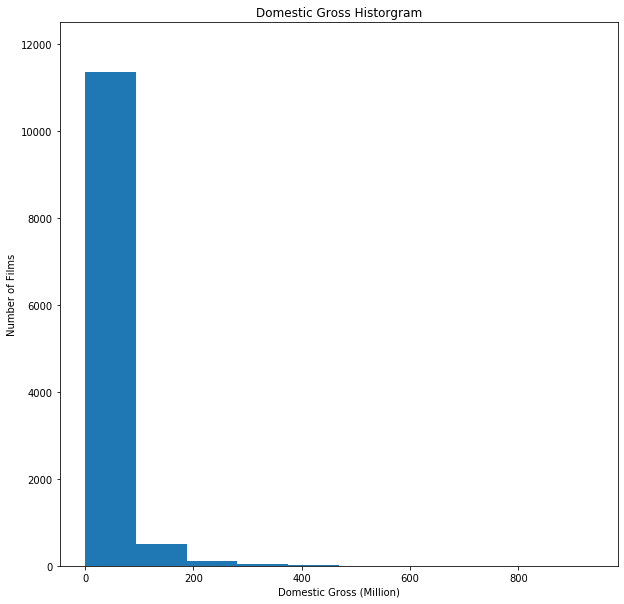

In [5]:
_ = plt.figure(figsize=(10,10))
_ = plt.hist(boxoffice_df['Domestic Gross']/1000000)
_ = plt.title('Domestic Gross Historgram')
_ = plt.xlabel('Domestic Gross (Million)')
_ = plt.ylabel('Number of Films')
_ = plt.ylim(0,12500)
plt.show()

In [6]:
gross_mean = boxoffice_df['Domestic Gross'].mean()
gross_std = boxoffice_df['Domestic Gross'].std()
print('The Domestic Gross Mean: ',gross_mean)
print('The Domestic Gross STD: ',gross_std)

The Domestic Gross Mean:  21550590.411471736
The Domestic Gross STD:  47191928.34335942


As can be observed from the histogram, a majority of the films in the dataset have a domestic gross under 100 million. While the mean domestic gross is 21.5 million, the standard deviation in domestic gross is far larger at 47.2 million.

In [7]:
n = len(boxoffice_df['Domestic Gross'])
critical_value = t(n-1).ppf(0.95)
gross_mean - critical_value/np.sqrt(n) * gross_std

20843314.40459191

To test whether domestic gross and critical reception are indeed independent, the dataset is split into two subsets. The good reception dataset contains films that have garnered a Rotten Tomato score of 80 percent or higher. The bad reception dataset contains films with a Rotten Tomatoes score of 40 or less.

In [8]:
good_reception = boxoffice_df[boxoffice_df['Rotten Tomatoes Score'] >= 80]
bad_reception = boxoffice_df[boxoffice_df['Rotten Tomatoes Score'] <= 40]
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'])

Ttest_indResult(statistic=1.3780678450897141, pvalue=0.168228603182457)

In [9]:
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'], equal_var= False)

Ttest_indResult(statistic=1.406879222081442, pvalue=0.15951933367412133)

In [10]:
good_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3466 entries, 0 to 45263
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 3139 non-null   object 
 1   Title                  3466 non-null   object 
 2   Domestic Gross         3466 non-null   float64
 3   Opening Weekend        3035 non-null   float64
 4   Domestic Multiplier    3035 non-null   float64
 5   Rotten Tomatoes Score  3466 non-null   float64
 6   Metascore              2842 non-null   float64
 7   imdbRating             3466 non-null   float64
 8   imdbVotes              3465 non-null   float64
 9   Year                   3466 non-null   int64  
 10  Month                  3463 non-null   float64
 11  budget                 1176 non-null   float64
 12  popularity             3465 non-null   float64
 13  vote_average           3409 non-null   float64
 14  vote_count             3409 non-null   float64
dtypes: 

In [11]:
bad_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 2 to 45373
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 2825 non-null   object 
 1   Title                  3201 non-null   object 
 2   Domestic Gross         3201 non-null   float64
 3   Opening Weekend        3075 non-null   float64
 4   Domestic Multiplier    3075 non-null   float64
 5   Rotten Tomatoes Score  3201 non-null   float64
 6   Metascore              2364 non-null   float64
 7   imdbRating             3201 non-null   float64
 8   imdbVotes              3201 non-null   float64
 9   Year                   3201 non-null   int64  
 10  Month                  3198 non-null   float64
 11  budget                 1289 non-null   float64
 12  popularity             3201 non-null   float64
 13  vote_average           3174 non-null   float64
 14  vote_count             3174 non-null   float64
dtypes: 

In [12]:
good_reception.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,3.466000e+03,3.035000e+03,3035.000000,3466.000000,2842.000000,3466.000000,3.465000e+03,3466.000000,3463.000000,1.176000e+03,3465.000000,3409.000000,3409.000000
mean,2.316840e+07,4.279396e+06,45.944776,89.490190,75.116467,7.273226,7.734689e+04,1999.545297,6.707479,2.222310e+07,5.185152,6.133940,270.513934
std,5.943677e+07,1.605748e+07,137.967082,5.937582,8.923202,0.562153,1.804204e+05,14.983448,3.581545,3.518259e+07,7.978518,1.668364,838.616270
min,5.820000e+02,3.000000e+01,0.480129,80.000000,31.000000,4.600000,3.800000e+01,1921.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,1.121642e+05,1.081050e+04,4.424689,85.000000,69.000000,6.900000,2.634000e+03,1992.000000,3.500000,3.000000e+06,0.861473,5.600000,6.000000
50%,1.197272e+06,4.116500e+04,10.968051,89.000000,75.000000,7.300000,1.100400e+04,2004.000000,7.000000,1.000000e+07,2.908434,6.500000,22.000000
75%,1.675281e+07,3.655845e+05,34.298741,94.000000,81.000000,7.700000,5.655000e+04,2011.000000,10.000000,2.600000e+07,7.772505,7.100000,122.000000
max,9.366622e+08,2.479667e+08,4468.300000,100.000000,100.000000,9.300000,2.154564e+06,2017.000000,12.000000,3.800000e+08,187.860492,10.000000,11444.000000


In [13]:
bad_reception.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,3.201000e+03,3.075000e+03,3075.000000,3201.000000,2364.000000,3201.000000,3201.000000,3201.000000,3198.000000,1.289000e+03,3201.000000,3174.000000,3174.000000
mean,2.152327e+07,7.074535e+06,9.218121,22.641674,36.135364,5.568229,32829.632615,2001.290847,6.433709,3.184953e+07,5.024167,5.560996,141.731884
std,3.338150e+07,1.103892e+07,121.059249,11.393255,10.499958,0.871037,52832.423887,9.585442,3.520237,3.544222e+07,6.082289,1.485820,484.931274
min,9.500000e+01,8.800000e+01,0.999984,0.000000,1.000000,1.500000,19.000000,1953.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,5.163490e+05,1.270960e+05,2.161899,14.000000,30.000000,5.100000,3752.000000,1994.000000,3.000000,8.500000e+06,1.136027,5.000000,7.000000
50%,9.623329e+06,3.427840e+06,2.715404,23.000000,37.000000,5.700000,11738.000000,2003.000000,7.000000,2.000000e+07,3.713996,5.700000,23.000000
75%,2.856500e+07,9.351290e+06,3.715458,33.000000,44.000000,6.200000,37915.000000,2009.000000,9.000000,4.000000e+07,7.756334,6.400000,91.000000
max,4.021119e+08,1.428391e+08,5757.944732,40.000000,68.000000,8.300000,455175.000000,2017.000000,12.000000,2.580000e+08,185.070892,10.000000,12114.000000


The graph below compares the domestic gross of films with positive critical reception and those with negative critical reception.

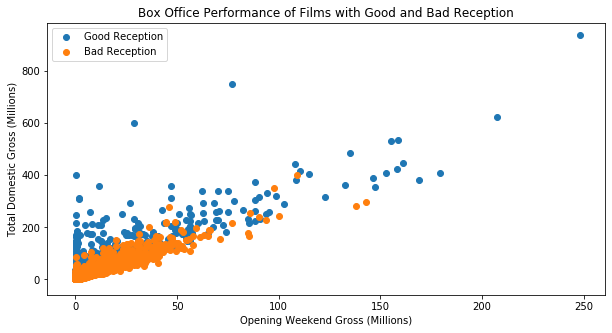

In [14]:
_ = plt.figure(figsize=(10,5))
_ = plt.scatter(good_reception['Opening Weekend']/1000000, good_reception['Domestic Gross']/1000000, label='Good Reception')
_ = plt.scatter(bad_reception['Opening Weekend']/1000000, bad_reception['Domestic Gross']/1000000, label='Bad Reception')
_ = plt.xlabel('Opening Weekend Gross (Millions)')
_ = plt.ylabel('Total Domestic Gross (Millions)')
_ = plt.title('Box Office Performance of Films with Good and Bad Reception')
_ = plt.legend()

As can be observed, there does exist some separation between the films with positive and negative reception. This difference visually is not striking, using inferential and frequentist statistical techniques involving 10,000 replicates let us statistically analyze the difference in these two subsets. 

In [15]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(boxoffice_df['Domestic Gross'],n))
gross_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
gross_confidence_interval

array([20724001.08044326, 22401433.42465552])

In [16]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception['Domestic Gross'], len(good_reception['Domestic Gross']))
    bad_sample = np.random.choice(bad_reception['Domestic Gross'], len(bad_reception['Domestic Gross']))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([19132344.57011372, 33429680.43865272])

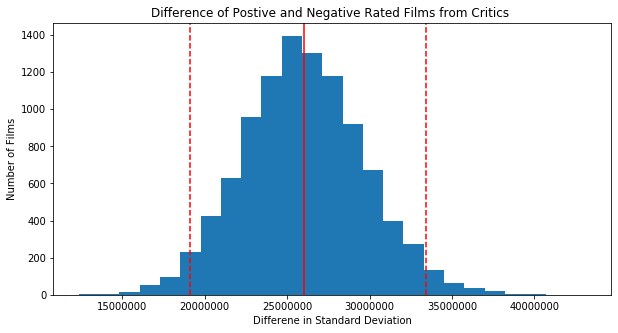

In [17]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.title('Difference of Postive and Negative Rated Films from Critics ')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [18]:
mean_diff = np.mean(good_reception['Domestic Gross']) - np.mean(bad_reception['Domestic Gross'])
mean_diff

1645128.6118958443

In [19]:
np.random.seed(47)
bad_shifted = bad_reception['Domestic Gross'] - np.mean(bad_reception['Domestic Gross']) + np.mean(good_reception['Domestic Gross'])

In [20]:
def permutation(d1,d2):
    d3 = np.concatenate((d1,d2))
    data = np.random.permutation(d3)
    perm_sample1 = data[:len(d1)]
    perm_sample2 = data[len(d1):]
    return perm_sample1,perm_sample2

In [21]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception['Domestic Gross'],bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [22]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0819

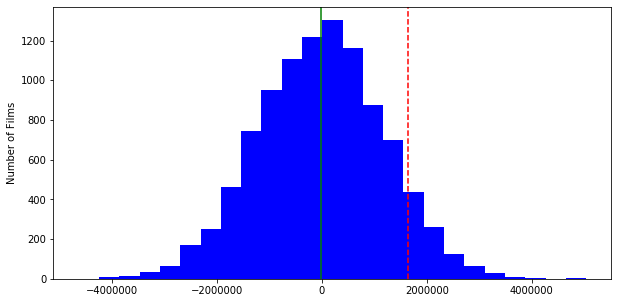

In [23]:
_ = plt.figure(figsize=(10,5))
_ = plt.ylabel('Number of Films')
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

Our final p-value is 0.0819 and is therefore above the 0.05 threshold needed to reject our null hypothesis. Statistically, we cannot claim that critical reception does have any significant impact on the domestic box office gross of any given film. However, this is not the only null hypothesis I want to test. The domestic multiplier of a film is calculated by dividing the final domestic gross by opening weekend gross. This is identified as the legs of a film, while they can vary vastly depending on the type of film number of theatres opened in. The graph below is a histogram of the domestic multiplier of all films in the dataset.  

/Users/sayantanchattopadhyay/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sayantanchattopadhyay/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


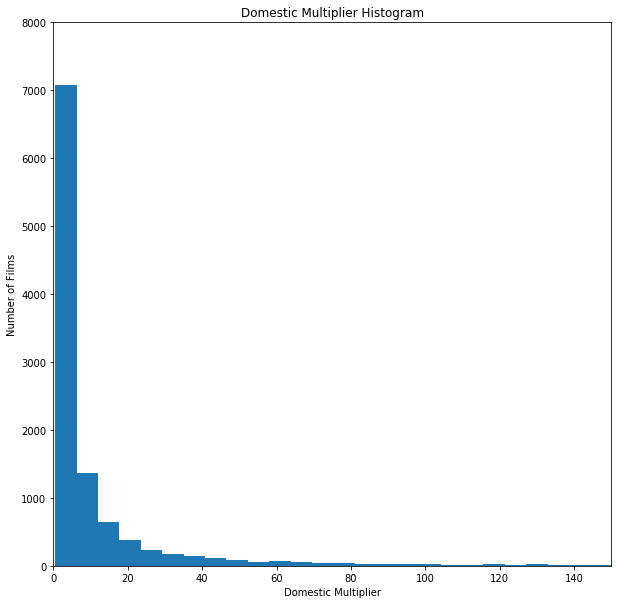

In [24]:
_ = plt.figure(figsize=(10,10))
_ = plt.hist(boxoffice_df['Domestic Multiplier'],bins=1000)
_ = plt.title('Domestic Multiplier Histogram')
_ = plt.xlabel('Domestic Multiplier')
_ = plt.ylabel('Number of Films')
_ = plt.ylim(0,8000)
_ = plt.xlim(0,150)

Similar to the histogram earlier, a majority of the data is near the origin, however, the bars in the graph towards the ends of the graph are more prevalent compared to the earlier histogram were they were practically invisible. 

In [25]:
multiplier_df = boxoffice_df[boxoffice_df['Domestic Multiplier'].notnull()]
multiplier = multiplier_df['Domestic Multiplier']
multiplier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11022 entries, 0 to 45373
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 9935 non-null   object 
 1   Title                  11022 non-null  object 
 2   Domestic Gross         11022 non-null  float64
 3   Opening Weekend        11022 non-null  float64
 4   Domestic Multiplier    11022 non-null  float64
 5   Rotten Tomatoes Score  10390 non-null  float64
 6   Metascore              8427 non-null   float64
 7   imdbRating             11021 non-null  float64
 8   imdbVotes              11020 non-null  float64
 9   Year                   11022 non-null  int64  
 10  Month                  11009 non-null  float64
 11  budget                 3987 non-null   float64
 12  popularity             11021 non-null  float64
 13  vote_average           10874 non-null  float64
 14  vote_count             10874 non-null  float64
dtypes:

In [26]:
multiplier_mean = multiplier.mean()
multiplier_std = multiplier.std()
print('Multiplier Mean: ',multiplier_mean)
print('Multiplier STD: ',multiplier_std)

Multiplier Mean:  22.756283565105736
Multiplier STD:  118.10983175753526


The observed standard deviation compared to the mean is even larger for multipliers than for domestic gross. 

In [27]:
n = len(multiplier)
critical_value = t(n-1).ppf(0.95)
gross_mean - critical_value/np.sqrt(n) * gross_std

20811153.23111374

Similar to earlier, the data is once again split between good and bad reception datasets. This process needs to be repeated, the multipliers dataframe has fewer films as there were roughly 1,000 films in the original dataframe without opening weekend data. 

In [28]:
good_reception = multiplier_df[multiplier_df['Rotten Tomatoes Score'] >= 80]
bad_reception = multiplier_df[multiplier_df['Rotten Tomatoes Score'] <= 40]
ttest_ind(good_reception['Domestic Multiplier'], bad_reception['Domestic Multiplier'])

Ttest_indResult(statistic=11.06395602806466, pvalue=3.4710327856231197e-28)

In [29]:
ttest_ind(good_reception['Domestic Multiplier'], bad_reception['Domestic Multiplier'], equal_var= False)

Ttest_indResult(statistic=11.054542699708865, pvalue=3.895022650453142e-28)

In [30]:
good_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3035 entries, 0 to 45263
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 2771 non-null   object 
 1   Title                  3035 non-null   object 
 2   Domestic Gross         3035 non-null   float64
 3   Opening Weekend        3035 non-null   float64
 4   Domestic Multiplier    3035 non-null   float64
 5   Rotten Tomatoes Score  3035 non-null   float64
 6   Metascore              2550 non-null   float64
 7   imdbRating             3035 non-null   float64
 8   imdbVotes              3034 non-null   float64
 9   Year                   3035 non-null   int64  
 10  Month                  3032 non-null   float64
 11  budget                 1014 non-null   float64
 12  popularity             3034 non-null   float64
 13  vote_average           2985 non-null   float64
 14  vote_count             2985 non-null   float64
dtypes: 

In [31]:
bad_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3075 entries, 2 to 45373
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 2725 non-null   object 
 1   Title                  3075 non-null   object 
 2   Domestic Gross         3075 non-null   float64
 3   Opening Weekend        3075 non-null   float64
 4   Domestic Multiplier    3075 non-null   float64
 5   Rotten Tomatoes Score  3075 non-null   float64
 6   Metascore              2295 non-null   float64
 7   imdbRating             3075 non-null   float64
 8   imdbVotes              3075 non-null   float64
 9   Year                   3075 non-null   int64  
 10  Month                  3072 non-null   float64
 11  budget                 1251 non-null   float64
 12  popularity             3075 non-null   float64
 13  vote_average           3048 non-null   float64
 14  vote_count             3048 non-null   float64
dtypes: 

In [32]:
good_reception.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,3.035000e+03,3.035000e+03,3035.000000,3035.000000,2550.000000,3035.000000,3.034000e+03,3035.000000,3032.000000,1.014000e+03,3034.000000,2985.000000,2985.000000
mean,2.434493e+07,4.279396e+06,45.944776,89.312356,75.040392,7.264679,8.156273e+04,2001.486326,6.676781,2.476200e+07,5.149522,6.060436,270.777554
std,6.254080e+07,1.605748e+07,137.967082,5.879808,8.654314,0.561983,1.879534e+05,13.519806,3.580955,3.707931e+07,8.280704,1.714082,871.423632
min,5.820000e+02,3.000000e+01,0.480129,80.000000,31.000000,4.600000,3.800000e+01,1921.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,1.068885e+05,1.081050e+04,4.424689,84.000000,69.000000,6.900000,2.645750e+03,1995.000000,3.000000,4.000000e+06,0.810043,5.500000,5.000000
50%,1.082124e+06,4.116500e+04,10.968051,89.000000,75.000000,7.300000,1.146050e+04,2005.000000,7.000000,1.275000e+07,2.800800,6.500000,20.000000
75%,1.642862e+07,3.655845e+05,34.298741,94.000000,81.000000,7.600000,5.950350e+04,2012.000000,10.000000,3.000000e+07,7.661880,7.100000,109.000000
max,9.366622e+08,2.479667e+08,4468.300000,100.000000,100.000000,9.300000,2.154564e+06,2017.000000,12.000000,3.800000e+08,187.860492,10.000000,11444.000000


In [33]:
bad_reception.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,3.075000e+03,3.075000e+03,3075.000000,3075.000000,2295.000000,3075.000000,3075.000000,3075.000000,3072.000000,1.251000e+03,3075.000000,3048.000000,3048.000000
mean,2.207046e+07,7.074535e+06,9.218121,22.512846,36.070153,5.566179,33835.135610,2001.655285,6.398112,3.247224e+07,5.097393,5.560958,141.532152
std,3.382518e+07,1.103892e+07,121.059249,11.345411,10.405043,0.869681,53605.679182,9.189019,3.527079,3.568737e+07,6.156350,1.478399,472.500488
min,9.500000e+01,8.800000e+01,0.999984,0.000000,1.000000,1.500000,19.000000,1973.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,5.641230e+05,1.270960e+05,2.161899,14.000000,30.000000,5.100000,3996.000000,1995.000000,3.000000,9.000000e+06,1.179372,5.000000,7.000000
50%,1.011501e+07,3.427840e+06,2.715404,23.000000,37.000000,5.700000,12237.000000,2003.000000,7.000000,2.100000e+07,3.790875,5.700000,24.000000
75%,2.981942e+07,9.351290e+06,3.715458,33.000000,44.000000,6.200000,39828.000000,2009.000000,9.000000,4.200000e+07,7.811223,6.400000,95.000000
max,4.021119e+08,1.428391e+08,5757.944732,40.000000,68.000000,8.300000,455175.000000,2017.000000,12.000000,2.580000e+08,185.070892,10.000000,12114.000000


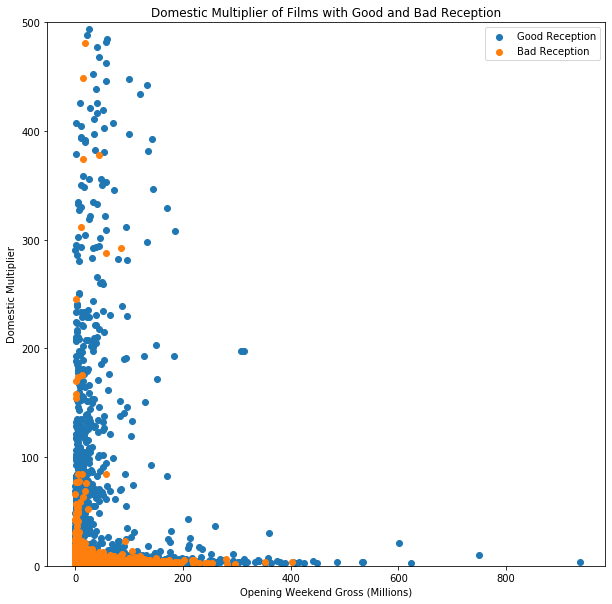

In [34]:
_ = plt.figure(figsize=(10,10))
_ = plt.scatter(good_reception['Domestic Gross']/1000000, good_reception['Domestic Multiplier'], label='Good Reception')
_ = plt.scatter(bad_reception['Domestic Gross']/1000000, bad_reception['Domestic Multiplier'], label='Bad Reception')
_ = plt.xlabel('Opening Weekend Gross (Millions)')
_ = plt.ylabel('Domestic Multiplier')
_ = plt.ylim(0,500)
_ = plt.title('Domestic Multiplier of Films with Good and Bad Reception')
_ = plt.legend()

The graph above displays a greater divide amongst films with good reception compared to those with bad critical reception. The inferential and frequentist statistical techniques are reapplied once more to test whether critical reception and domestic multipliers are independent of each other. 

In [35]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(multiplier,len(multiplier)))
multiplier_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
multiplier_confidence_interval

array([20.73640892, 25.12030666])

In [36]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception['Domestic Multiplier'], len(good_reception['Domestic Multiplier']))
    bad_sample = np.random.choice(bad_reception['Domestic Multiplier'], len(bad_reception['Domestic Multiplier']))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([-75.92466973, 120.42076445])

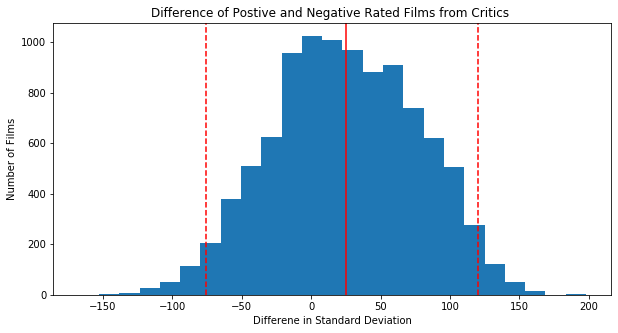

In [37]:
_ = plt.figure(figsize=(10,5))
_ = plt.title('Difference of Postive and Negative Rated Films from Critics ')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [38]:
mean_diff = np.mean(good_reception['Domestic Multiplier']) - np.mean(bad_reception['Domestic Multiplier'])
mean_diff

36.726654376012405

In [39]:
np.random.seed(47)
bad_shifted = bad_reception['Domestic Multiplier'] - np.mean(bad_reception['Domestic Multiplier']) + np.mean(good_reception['Domestic Multiplier'])

In [40]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception['Domestic Multiplier'],bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [41]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0

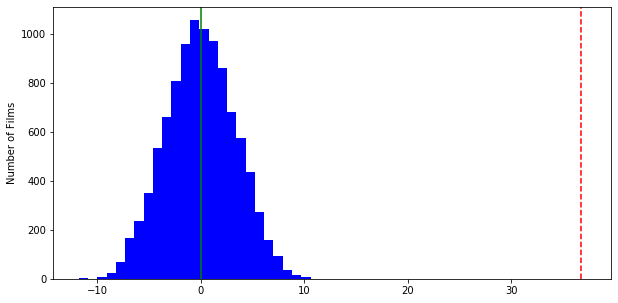

In [42]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

With a final p-value of 0.0 under the 0.05 threshold and therefore statistically significant. The null hypothesis can be rejected, unlike domestic gross, the box office multiplier is dependent on critical reception. After looking at the critical response, the next metric that I wanted to further examine was audience ratings for films and their impact on the box office performance. Similar to the steps taken earlier I will repeat the null hypothesis for both domestic gross and multiplier compared to the IMDB ratings. The dataset will be divided with a score of 7.5 and above being classified as positive reception and scores of 5.5 and under as negative reception.

In [43]:
good_reception = boxoffice_df[boxoffice_df['imdbRating'] > 7.5]
bad_reception = boxoffice_df[boxoffice_df['imdbRating'] < 5.5]
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'])

Ttest_indResult(statistic=10.53086741859825, pvalue=1.6454432563032533e-25)

In [44]:
ttest_ind(good_reception['Domestic Gross'], bad_reception['Domestic Gross'], equal_var= False)

Ttest_indResult(statistic=9.647709014383754, pvalue=1.816727978608195e-21)

In [45]:
good_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 45165
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 1274 non-null   object 
 1   Title                  1401 non-null   object 
 2   Domestic Gross         1401 non-null   float64
 3   Opening Weekend        1222 non-null   float64
 4   Domestic Multiplier    1222 non-null   float64
 5   Rotten Tomatoes Score  1352 non-null   float64
 6   Metascore              1106 non-null   float64
 7   imdbRating             1401 non-null   float64
 8   imdbVotes              1400 non-null   float64
 9   Year                   1401 non-null   int64  
 10  Month                  1399 non-null   float64
 11  budget                 564 non-null    float64
 12  popularity             1400 non-null   float64
 13  vote_average           1377 non-null   float64
 14  vote_count             1377 non-null   float64
dtypes: 

In [46]:
bad_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 63 to 45366
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 1546 non-null   object 
 1   Title                  1748 non-null   object 
 2   Domestic Gross         1748 non-null   float64
 3   Opening Weekend        1634 non-null   float64
 4   Domestic Multiplier    1634 non-null   float64
 5   Rotten Tomatoes Score  1482 non-null   float64
 6   Metascore              1078 non-null   float64
 7   imdbRating             1748 non-null   float64
 8   imdbVotes              1748 non-null   float64
 9   Year                   1748 non-null   int64  
 10  Month                  1746 non-null   float64
 11  budget                 604 non-null    float64
 12  popularity             1748 non-null   float64
 13  vote_average           1725 non-null   float64
 14  vote_count             1725 non-null   float64
dtypes:

In [47]:
good_reception.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,1.401000e+03,1.222000e+03,1222.000000,1352.000000,1106.000000,1401.000000,1.400000e+03,1401.000000,1399.000000,5.640000e+02,1400.000000,1377.000000,1377.000000
mean,3.644593e+07,6.977554e+06,53.736764,87.261095,75.354430,7.869879,1.642971e+05,1996.814418,6.867763,2.347335e+07,6.691368,6.412200,504.199710
std,8.002762e+07,2.150063e+07,129.229273,11.907453,11.822942,0.269827,2.789252e+05,16.791064,3.614719,3.477894e+07,10.777901,1.712411,1232.243034
min,2.110000e+02,8.600000e+01,0.480129,19.000000,28.000000,7.600000,3.000000e+01,1921.000000,1.000000,8.000000e+00,0.000000,0.000000,0.000000
25%,1.773450e+05,1.228500e+04,4.281085,83.000000,68.000000,7.700000,5.835000e+03,1989.000000,4.000000,4.000000e+06,0.976303,5.800000,8.000000
50%,2.087128e+06,5.996100e+04,11.613903,91.000000,76.000000,7.800000,3.254150e+04,2002.000000,7.000000,1.225000e+07,4.166633,7.000000,38.000000
75%,3.440030e+07,9.247440e+05,39.069659,95.000000,84.000000,8.000000,2.042750e+05,2009.000000,10.000000,2.800000e+07,9.586331,7.500000,315.000000
max,9.366622e+08,2.479667e+08,1337.085761,100.000000,100.000000,9.300000,2.154564e+06,2017.000000,12.000000,3.800000e+08,187.860492,10.000000,11444.000000


In [48]:
bad_reception.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,1.748000e+03,1.634000e+03,1634.000000,1482.000000,1078.000000,1748.000000,1748.000000,1748.000000,1746.000000,6.040000e+02,1748.000000,1725.000000,1725.000000
mean,1.488318e+07,5.297244e+06,5.999410,23.081646,34.535250,4.749256,16902.073227,2000.865561,6.278351,2.826469e+07,4.010943,5.232638,100.891594
std,2.722277e+07,9.584096e+06,48.132842,17.697685,13.186758,0.684270,29995.636185,10.240760,3.534417,3.130481e+07,4.660239,1.680990,351.793242
min,3.000000e+01,2.000000e+01,0.999984,0.000000,1.000000,1.500000,19.000000,1975.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,1.467982e+05,5.014925e+04,1.950130,10.000000,25.250000,4.500000,1830.250000,1993.750000,3.000000,7.000000e+06,0.791732,4.600000,5.000000
50%,4.617134e+06,2.136180e+06,2.468785,19.000000,34.000000,5.000000,5959.500000,2002.000000,6.000000,1.800000e+07,2.239534,5.300000,16.000000
75%,1.732416e+07,6.328772e+06,3.337099,33.000000,43.000000,5.225000,18971.000000,2010.000000,9.000000,4.000000e+07,6.250295,6.300000,59.000000
max,3.005318e+08,1.428391e+08,1429.432528,93.000000,73.000000,5.400000,401686.000000,2017.000000,12.000000,2.000000e+08,88.561239,10.000000,6324.000000


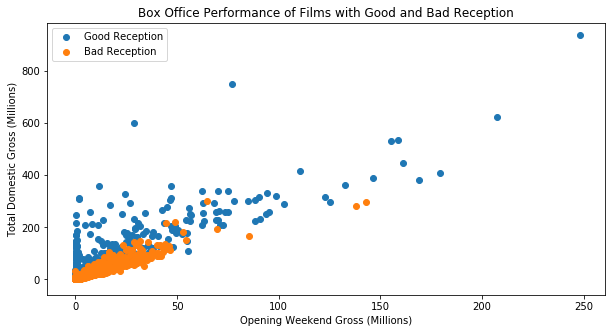

In [49]:
_ = plt.figure(figsize=(10,5))
_ = plt.scatter(good_reception['Opening Weekend']/1000000, good_reception['Domestic Gross']/1000000, label='Good Reception')
_ = plt.scatter(bad_reception['Opening Weekend']/1000000, bad_reception['Domestic Gross']/1000000, label='Bad Reception')
_ = plt.xlabel('Opening Weekend Gross (Millions)')
_ = plt.ylabel('Total Domestic Gross (Millions)')
_ = plt.title('Box Office Performance of Films with Good and Bad Reception')
_ = plt.legend()

In [50]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(boxoffice_df['Domestic Gross'],len(boxoffice_df['Domestic Gross'])))
gross_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
gross_confidence_interval

array([20724001.08044326, 22401433.42465552])

In [51]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception['Domestic Gross'], len(good_reception['Domestic Gross']))
    bad_sample = np.random.choice(bad_reception['Domestic Gross'], len(bad_reception['Domestic Gross']))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([41989618.33889896, 64092731.19290581])

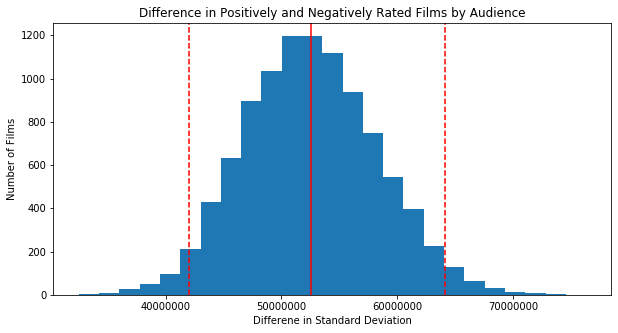

In [52]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.title('Difference in Positively and Negatively Rated Films by Audience')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [53]:
mean_diff = np.mean(good_reception['Domestic Gross']) - np.mean(bad_reception['Domestic Gross'])
mean_diff

21562746.958332308

In [54]:
np.random.seed(47)
bad_shifted = bad_reception['Domestic Gross'] - np.mean(bad_reception['Domestic Gross']) + np.mean(good_reception['Domestic Gross'])

In [55]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception['Domestic Gross'],bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [56]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0

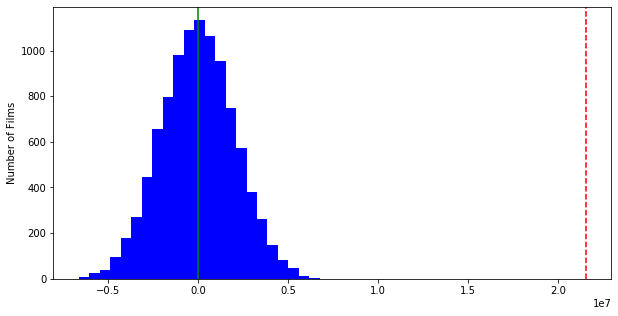

In [57]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

In contrast to critics' ratings, the audience ratings do have an impact on box office gross. With a final p-value of 0.0, the difference between the films with good reception and bad reception is statistically significant. 

In [58]:
good_reception = multiplier_df[multiplier_df['imdbRating'] >= 7.5]
bad_reception = multiplier_df[multiplier_df['imdbRating'] <= 5.5]
ttest_ind(good_reception['Domestic Multiplier'], bad_reception['Domestic Multiplier'])

Ttest_indResult(statistic=12.863954175531452, pvalue=5.188186792388572e-37)

In [59]:
ttest_ind(good_reception['Domestic Multiplier'], bad_reception['Domestic Multiplier'], equal_var= False)

Ttest_indResult(statistic=12.158341057591917, pvalue=5.562531411374487e-33)

In [60]:
good_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 0 to 45187
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 1394 non-null   object 
 1   Title                  1522 non-null   object 
 2   Domestic Gross         1522 non-null   float64
 3   Opening Weekend        1522 non-null   float64
 4   Domestic Multiplier    1522 non-null   float64
 5   Rotten Tomatoes Score  1472 non-null   float64
 6   Metascore              1237 non-null   float64
 7   imdbRating             1522 non-null   float64
 8   imdbVotes              1521 non-null   float64
 9   Year                   1522 non-null   int64  
 10  Month                  1520 non-null   float64
 11  budget                 571 non-null    float64
 12  popularity             1521 non-null   float64
 13  vote_average           1496 non-null   float64
 14  vote_count             1496 non-null   float64
dtypes: 

In [61]:
bad_reception.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 7 to 45366
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 1661 non-null   object 
 1   Title                  1874 non-null   object 
 2   Domestic Gross         1874 non-null   float64
 3   Opening Weekend        1874 non-null   float64
 4   Domestic Multiplier    1874 non-null   float64
 5   Rotten Tomatoes Score  1642 non-null   float64
 6   Metascore              1213 non-null   float64
 7   imdbRating             1874 non-null   float64
 8   imdbVotes              1874 non-null   float64
 9   Year                   1874 non-null   int64  
 10  Month                  1872 non-null   float64
 11  budget                 673 non-null    float64
 12  popularity             1874 non-null   float64
 13  vote_average           1847 non-null   float64
 14  vote_count             1847 non-null   float64
dtypes: 

In [62]:
good_reception.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,1.522000e+03,1.522000e+03,1522.000000,1472.000000,1237.000000,1522.000000,1.521000e+03,1522.000000,1520.000000,5.710000e+02,1521.000000,1496.000000,1496.000000
mean,3.522177e+07,6.326616e+06,53.762620,86.066576,74.282943,7.796255,1.530556e+05,1999.486202,6.701316,2.612752e+07,6.307468,6.276203,449.236631
std,7.975043e+07,2.035744e+07,134.596303,12.386685,11.604282,0.284498,2.689384e+05,14.946369,3.613339,3.739471e+07,10.928355,1.737348,1181.332665
min,2.110000e+02,8.600000e+01,0.480129,19.000000,28.000000,7.500000,3.000000e+01,1921.000000,1.000000,8.000000e+00,0.000000,0.000000,0.000000
25%,1.617100e+05,1.228500e+04,4.285543,81.000000,68.000000,7.600000,5.118000e+03,1993.000000,3.000000,5.000000e+06,0.930397,5.700000,7.000000
50%,1.600878e+06,5.160250e+04,11.716726,89.000000,75.000000,7.700000,2.700200e+04,2004.000000,7.000000,1.500000e+07,3.468202,6.700000,29.000000
75%,3.162919e+07,7.295305e+05,39.288812,95.000000,83.000000,7.975000,1.777950e+05,2010.000000,10.000000,3.000000e+07,8.912292,7.400000,218.000000
max,9.366622e+08,2.479667e+08,1646.485102,100.000000,100.000000,9.300000,2.154564e+06,2017.000000,12.000000,3.800000e+08,187.860492,10.000000,11444.000000


In [63]:
bad_reception.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,1.874000e+03,1.874000e+03,1874.000000,1642.000000,1213.000000,1874.000000,1874.000000,1874.000000,1872.000000,6.730000e+02,1874.000000,1847.000000,1847.000000
mean,1.626861e+07,5.509261e+06,7.048904,23.845311,35.407255,4.846745,18842.302561,2001.456777,6.259615,2.999414e+07,4.202634,5.272225,106.761776
std,2.871325e+07,1.006811e+07,73.196268,17.981586,13.240752,0.684402,32315.145308,9.725518,3.543109,3.319141e+07,4.711991,1.643244,355.162424
min,3.000000e+01,2.000000e+01,0.999984,0.000000,1.000000,1.500000,19.000000,1977.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,1.691865e+05,4.869250e+04,1.966967,11.000000,26.000000,4.600000,2130.500000,1994.000000,3.000000,7.300000e+06,0.844255,4.700000,5.000000
50%,5.574408e+06,2.186745e+06,2.498905,19.500000,35.000000,5.100000,6698.500000,2003.000000,6.000000,1.900000e+07,2.397200,5.300000,18.000000
75%,1.971955e+07,6.609927e+06,3.389423,34.000000,44.000000,5.300000,20744.250000,2010.000000,9.000000,4.000000e+07,6.639289,6.300000,65.000000
max,3.005318e+08,1.428391e+08,2505.688057,100.000000,76.000000,5.500000,401686.000000,2017.000000,12.000000,2.000000e+08,88.561239,10.000000,6324.000000


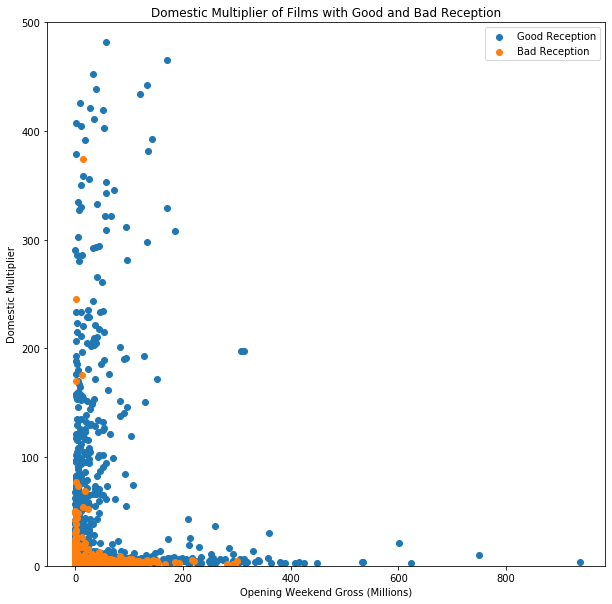

In [64]:
_ = plt.figure(figsize=(10,10))
_ = plt.scatter(good_reception['Domestic Gross']/1000000, good_reception['Domestic Multiplier'], label='Good Reception')
_ = plt.scatter(bad_reception['Domestic Gross']/1000000, bad_reception['Domestic Multiplier'], label='Bad Reception')
_ = plt.xlabel('Opening Weekend Gross (Millions)')
_ = plt.ylabel('Domestic Multiplier')
_ = plt.ylim(0,500)
_ = plt.title('Domestic Multiplier of Films with Good and Bad Reception')
_ = plt.legend()

In [65]:
np.random.seed(47)
N_rep = 10000
mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    mean_replicates[i] = np.mean(np.random.choice(multiplier,len(multiplier)))
multiplier_confidence_interval = np.percentile(mean_replicates,[2.5,97.5])
multiplier_confidence_interval

array([20.73640892, 25.12030666])

In [66]:
np.random.seed(47)
diff_std_replicates = np.empty(N_rep)
for i in range(N_rep):
    good_sample = np.random.choice(good_reception['Domestic Multiplier'], len(good_reception['Domestic Multiplier']))
    bad_sample = np.random.choice(bad_reception['Domestic Multiplier'], len(bad_reception['Domestic Multiplier']))
    diff_std_replicates[i] = np.std(good_sample) - np.std(bad_sample)
confidence_interval = np.percentile(diff_std_replicates,[2.5,97.5])
confidence_interval

array([ 12.91763416, 119.55957122])

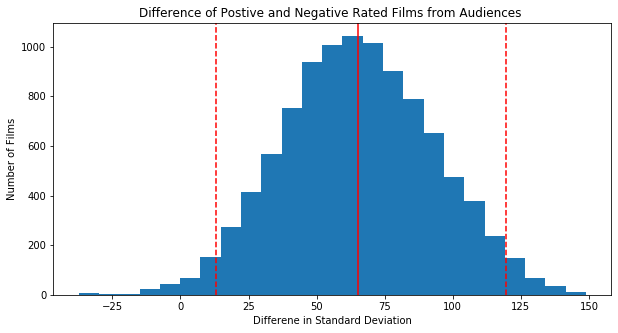

In [67]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(diff_std_replicates,bins=25)
_ = plt.title('Difference of Postive and Negative Rated Films from Audiences ')
_ = plt.xlabel('Differene in Standard Deviation')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(diff_std_replicates),color='r')
_ = plt.axvline(confidence_interval[0],color='r',linestyle='--')
_ = plt.axvline(confidence_interval[1],color='r',linestyle='--')

In [68]:
mean_diff = np.mean(good_reception['Domestic Multiplier']) - np.mean(bad_reception['Domestic Multiplier'])
mean_diff

46.71371523088091

In [69]:
np.random.seed(47)
bad_shifted = bad_reception['Domestic Multiplier'] - np.mean(bad_reception['Domestic Multiplier']) + np.mean(good_reception['Domestic Multiplier'])

In [70]:
permutation_mean_replicates = np.empty(N_rep)
for i in range(N_rep):
    perm_good, perm_bad = permutation(good_reception['Domestic Multiplier'],bad_shifted)
    permutation_mean_replicates[i] = np.mean(perm_good) - np.mean(perm_bad)

In [71]:
p_value = np.sum(permutation_mean_replicates >= mean_diff)/len(permutation_mean_replicates)
p_value

0.0

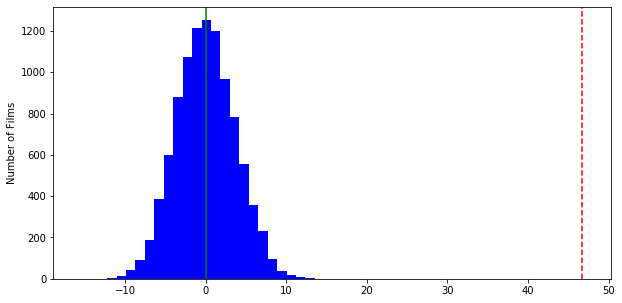

In [72]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(mean_diff, bins=25)
_ = plt.hist(permutation_mean_replicates,bins=25,color='blue')
_ = plt.ylabel('Number of Films')
_ = plt.axvline(np.mean(permutation_mean_replicates), color='green')
_ = plt.axvline(np.mean(mean_diff),color='red',linestyle='--')

Finally, the null hypothesis that audience ratings and box office multipliers are independent can be rejected. Similar to critics ratings, the multiplier of films are impacted by audience ratings. 

In conclusion, using statistical techniques such as inferential and frequentist statistics we can assert that the reception of a film does have a statistical significance in box office performance. Due to critics ratings not impacting box office gross for films, we can also conclude that audience ratings are of greater significance to box office performance than critics. We cannot deny however the importance of critics' reviews as they did affect box office multipliers of films. Through this statistical analysis, we have gained valuable insights into our data. We now understand the importance of the reception and how it impacts the overall box office performance. These metrics provided by the dataset will be critical in our predictive model producing accurate predictions.  